<a href="https://www.kaggle.com/code/ravivarmaodugu/chennai-properties-eda-modeling?scriptVersionId=140314937" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**Notebook Overview**

Hi, the notebook is based on [Chennai Housing Sales Price dataset](https://www.kaggle.com/datasets/kunwarakash/chennai-housing-sales-price), which has 7100 plus records and around 22 features in it. 

Thorugh this notebook, we try to take a closer look at real estate scenario in the Chennai city and figure out key trends and patterns in major areas of the metropolis through different parameters. 

Some of the questions we try to answer through our notebook are
1. Age & sale price trends in different areas of the city
2. Areas with highest number of properties, and highest priced properties
3. Influence of property characteristics such as sale condition, and build type on sale price etc

Besides data analysis and data visualization, we also focus on building models, evaluate them and make predictions. 

So let's get started.

**Note about the Chennai City:** Chennai is the capital city of India's Southern state of Tamil Nadu and is fourth largest city in India. Known for its rich heritage and culture, the city is a buzzing business and commercial hub. The Chennai port is one of the busiest ports in India, and it directly connects with several ASEAN and East Asian countries.


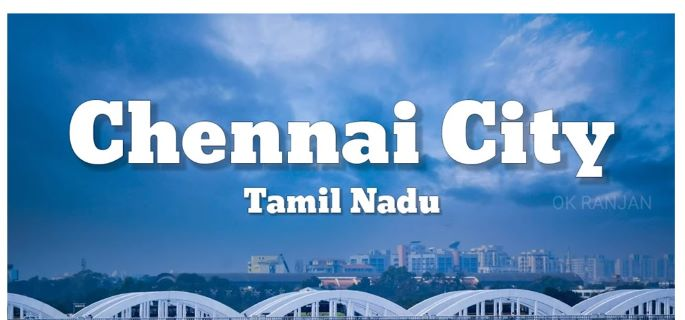


In [54]:
## Import relevant libraries for data processing & visualisation 

import numpy as np              # linear algebra
import pandas as pd             # data processing, dataset file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization & graphical plotting
import seaborn as sns           # to visualize random distributions
%matplotlib inline

## Add additional libraries to prepare and run the model

from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor

pd.options.display.float_format = '{:.2f}'.format

import warnings                 # to deal with warning messages
warnings.filterwarnings('ignore')

## Loading the Data, Processing & Preparing it for EDA

In [55]:
## Load the data file into the environment
df_pre = pd.read_csv("/kaggle/input/chennai-housing-sales-price/Chennai houseing sale.csv")

## have a glance at the dataset contents & feature variables
df_pre.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.00,1.00,3,AbNormal,Yes,...,AllPub,Paved,A,4.00,3.90,4.90,4.33,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.00,1.00,5,AbNormal,No,...,AllPub,Gravel,RH,4.90,4.20,2.50,3.77,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.00,1.00,3,AbNormal,Yes,...,ELO,Gravel,RL,4.10,3.80,2.20,3.09,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.00,2.00,5,Family,No,...,NoSewr,Paved,I,4.70,3.90,3.60,4.01,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.00,1.00,3,AbNormal,Yes,...,AllPub,Gravel,C,3.00,2.50,4.10,3.29,237000,74063,7406250


In [56]:
## Checking the shape of the dataset
print(f'\033[94mNumber of rows in the dataset are: {df_pre.shape[0]}')
print(f'\033[94mNumber of columns in the dataset are: {df_pre.shape[1]}')
print(f'\033[94mNumber of values in the dataset are: {df_pre.count().sum()}')
print(f'\033[94mNumber missing values in the dataset are: {sum(df_pre.isna().sum())}')

Number of rows in the dataset are: 7109
Number of columns in the dataset are: 22
Number of values in the dataset are: 156344
Number missing values in the dataset are: 54


#### Dealing with null values

In [57]:
## Listing the features with null values & null value count
pd.isnull(df_pre).sum()[pd.isnull(df_pre).sum() > 0]

N_BEDROOM      1
N_BATHROOM     5
QS_OVERALL    48
dtype: int64

- As per the output received, N_BEDROOM, N_BATHROOM, & QS_OVERALL have null values

In [58]:
## We deal with null values by  interpolating in forward fill method
df = df_pre.interpolate('ffill')

## check for any null values, after modifying
pd.isnull(df).sum()[pd.isnull(df).sum() > 0]

Series([], dtype: int64)

#### Checking the Dataframe information, & converting the datatypes as per the need

In [59]:
# See the information about the DataFrame including  data type, columns, non-null values, memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7109 non-null   float64
 6   N_BATHROOM     7109 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [60]:
## Converting the datatype of Features from float to integer
df["N_BATHROOM"]=df["N_BATHROOM"].astype(int)
df["N_BATHROOM"]=df["N_BATHROOM"].astype(int)
df["N_BEDROOM"]=df["N_BEDROOM"].astype(int)
df["QS_BATHROOM"]=df["QS_BATHROOM"].astype(int)
df["QS_BEDROOM"]=df["QS_BEDROOM"].astype(int)
df["QS_OVERALL"]=df["QS_OVERALL"].astype(int)
df["QS_ROOMS"]=df["QS_ROOMS"].astype(int)

#### Dealing with errors & mistakes in segment names in categorical features

In [61]:
## Checking the labels in categorical features
for col in df.columns:
    if df[col].dtype=='object':
        print()
        print(col)
        print(df[col].unique())


PRT_ID
['P03210' 'P09411' 'P01812' ... 'P09594' 'P06508' 'P09794']

AREA
['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar']

DATE_SALE
['04-05-2011' '19-12-2006' '04-02-2012' ... '28-03-2014' '25-08-2006'
 '13-07-2005']

SALE_COND
['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl']

PARK_FACIL
['Yes' 'No' 'Noo']

DATE_BUILD
['15-05-1967' '22-12-1995' '09-02-1992' ... '01-09-1978' '11-08-1977'
 '24-07-1961']

BUILDTYPE
['Commercial' 'Others' 'Other' 'House' 'Comercial']

UTILITY_AVAIL
['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub']

STREET
['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess']

MZZONE
['A' 'RH' 'RL' 'I' 'C' 'RM']


**Key Observations**  
- As you can see, numerous errors are there in the categorical data
- Features - AREA, SALE_COND, PARK_FACIL, BUILDTYPE, UTILITY_AVAIL,STREET - have some errors, which need rectification

In [62]:
## Renaming the inappropriately given names
## We use .replace() with .apply() to refine the names
df = df.apply(lambda x: x.replace({'Adyr':'Adyar', 'TNagar': 'T Nagar', 'Chrompt': 'Chrompet', 'Chrmpet':'Chrompet', 'Chormpet': 'Chrompet', 'Ann Nagar': 'Anna Nagar',  'Ana Nagar': 'Anna Nagar', 'Velchery': 'Velachery', 'KKNagar': 'KK Nagar', 'Karapakam':'Karapakkam', 'Ab Normal': 'AbNormal', 'Partiall':'Partial', 'PartiaLl': 'Partial', 'AdjLand': 'Adj Land', 'Noo': 'No', 'Comercial':'Commercial', 'Others': 'Other', 'AllPub': 'All Pub', 'NoSewr ':'NoSeWa', 'NoAccess': 'No Access', 'Pavd':'Paved'}, regex=True))

## Checking the modifications done to names in each feature variable
for col in df.columns:
    if df[col].dtype=='object':
        print()
        print(col)
        print(df[col].unique())


PRT_ID
['P03210' 'P09411' 'P01812' ... 'P09594' 'P06508' 'P09794']

AREA
['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'T Nagar']

DATE_SALE
['04-05-2011' '19-12-2006' '04-02-2012' ... '28-03-2014' '25-08-2006'
 '13-07-2005']

SALE_COND
['AbNormal' 'Family' 'Partial' 'Adj Land' 'Normal Sale']

PARK_FACIL
['Yes' 'No']

DATE_BUILD
['15-05-1967' '22-12-1995' '09-02-1992' ... '01-09-1978' '11-08-1977'
 '24-07-1961']

BUILDTYPE
['Commercial' 'Other' 'House']

UTILITY_AVAIL
['All Pub' 'ELO' 'NoSeWa']

STREET
['Paved' 'Gravel' 'No Access']

MZZONE
['A' 'RH' 'RL' 'I' 'C' 'RM']


In [63]:
# Before proceeding to EDA, we check the Stastical Description of th DataFrame one more time
df.describe().round(0).T

,count,mean,std,min,25%,50%,75%,max
INT_SQFT,7109.00,1382.00,457.00,500.00,993.00,1373.00,1744.00,2500.00
DIST_MAINROAD,7109.00,100.00,57.00,0.00,50.00,99.00,148.00,200.00
N_BEDROOM,7109.00,2.00,1.00,1.00,1.00,1.00,2.00,4.00
N_BATHROOM,7109.00,1.00,0.00,1.00,1.00,1.00,1.00,2.00
N_ROOM,7109.00,4.00,1.00,2.00,3.00,4.00,4.00,6.00
QS_ROOMS,7109.00,3.00,1.00,2.00,2.00,3.00,4.00,5.00
QS_BATHROOM,7109.00,3.00,1.00,2.00,2.00,3.00,4.00,5.00
QS_BEDROOM,7109.00,3.00,1.00,2.00,2.00,3.00,4.00,5.00
QS_OVERALL,7109.00,3.00,1.00,2.00,3.00,3.00,3.00,4.00
REG_FEE,7109.00,376938.00,143071.00,71177.00,272406.00,349486.00,451562.00,983922.00


## Exploratory Data Analysis (EDA)

#### **Analysing Property Sale Price by Age of the Property**

- To do that, we need an Age feature, which we don't have in our dataset
- We create the same by using DATE_SALE & DATE_BUILD features
- First, we convert the data type of these features into DateTime datatype
- Later build the age column, by deducting the DATE_SALE from DATE_BUILD, which gives the age of the property
- After that we make a lineplot with property age on X-axis, sale price on Y-axis, and Area as hue

In [64]:
## As per the above .info() function output, the two date columns - DATE_SALE & DATE_BUILD are in object format
## We convert them into DateTime dtype
df['DATE_SALE'] = pd.to_datetime(df['DATE_SALE'], format='%d-%m-%Y')
df['DATE_BUILD'] = pd.to_datetime(df['DATE_BUILD'], format='%d-%m-%Y')
df[['DATE_SALE', 'DATE_BUILD']].head(5)

,DATE_SALE,DATE_BUILD
0,2011-05-04,1967-05-15
1,2006-12-19,1995-12-22
2,2012-02-04,1992-02-09
3,2010-03-13,1988-03-18
4,2009-10-05,1979-10-13


In [65]:
## We create a new column to determine the age of property
df['PROP_AGE'] = pd.DatetimeIndex(df['DATE_SALE'] ).year - pd.DatetimeIndex(df['DATE_BUILD']).year
df['PROP_AGE'].head(5)

0    44
1    11
2    20
3    22
4    30
Name: PROP_AGE, dtype: int64

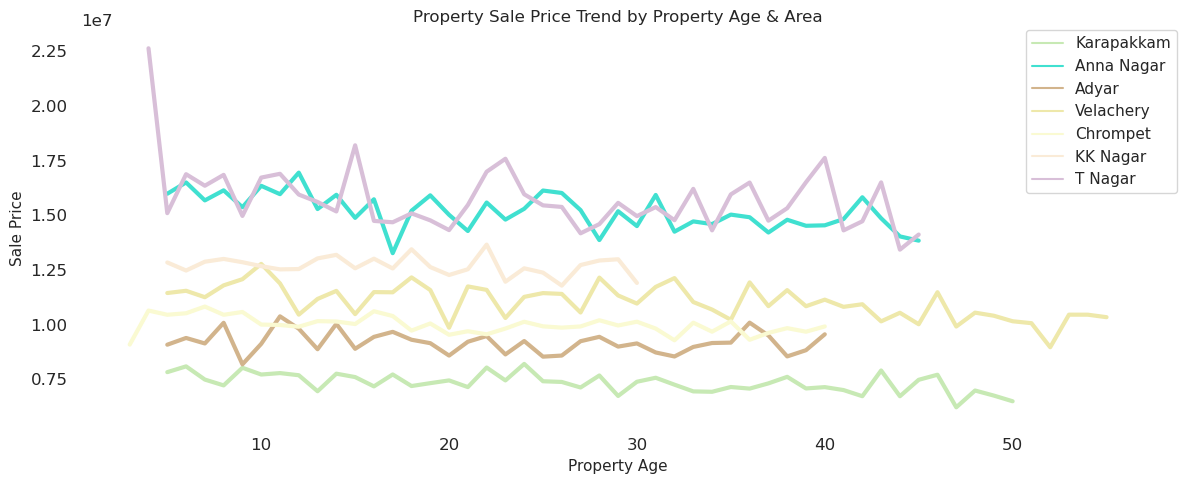

In [66]:
## Sale Price by Property Age (we put Area as hue)
sns.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':12,'ytick.labelsize':12, 'figure.autolayout':True})
plt.figure(figsize=(12,5))
my_col = ('#c7e9b4', '#40E0D0', '#D2B48C', '#EEE8AA','#FAFAD2','#FAEBD7', '#D8BFD8','#F4A460','#F08080')

sns.lineplot(data=df, x = "PROP_AGE", y = "SALES_PRICE", hue="AREA", style="AREA", palette= my_col, ci=None, linewidth=3, dashes=False).set(title='Property Sale Price Trend by Property Age & Area')
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)

plt.xlabel('Property Age', fontsize=11), plt.ylabel('Sale Price', fontsize=11)

plt.show()

**Some Quick Observations**

- Of all the areas, T Nagar & Anna Nagar have highest priced properties
- Chrompet & Karapakkam have oldest properties, some properties are older than 50 years
- Karapakkam has lowest priced properties

#### Gauge the Distribution in Key Numerical Features

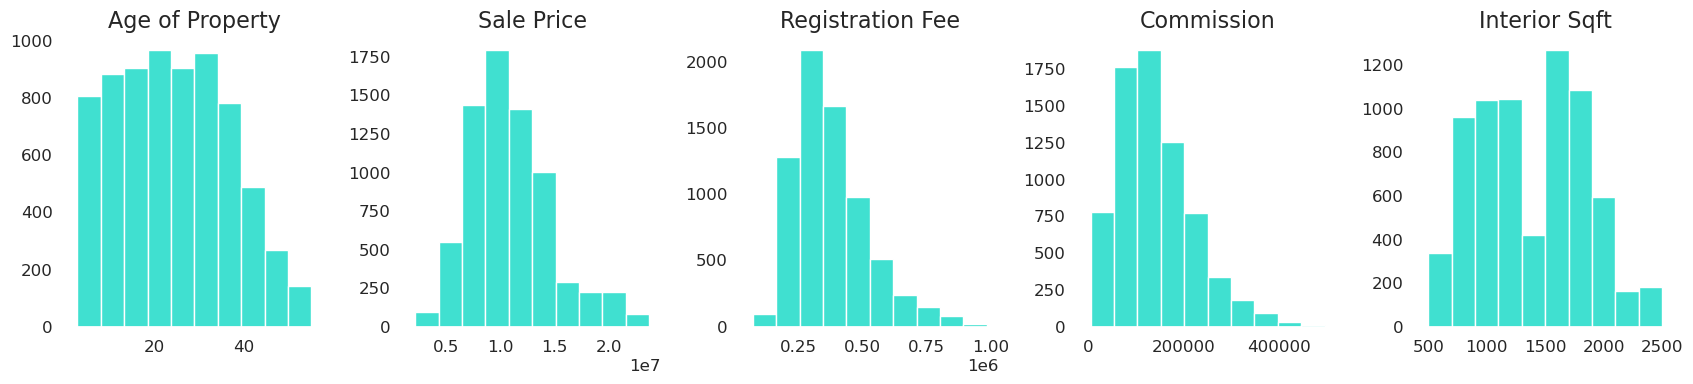

In [67]:
## We create histograms for key numerical features - PROP_AGE, SALES_PRICE, REG_FEE, COMMIS, COMMIS, INT_SQFT
fig, axes = plt.subplots(1, 5, figsize=(17,4))
PROP_AGE = df.PROP_AGE.hist(ax=axes[0], color="#40E0D0", grid=False).set_title('Age of Property', fontsize=16)
SALES_PRICE = df.SALES_PRICE.hist(ax=axes[1], color="#40E0D0", grid=False).set_title('Sale Price', fontsize=16)
REG_FEE = df.REG_FEE.hist(ax=axes[2], color="#40E0D0", grid=False).set_title('Registration Fee', fontsize=16)
COMMIS = df.COMMIS.hist(ax=axes[3], color="#40E0D0", grid=False).set_title('Commission', fontsize=16)
INT_SQFT = df.INT_SQFT.hist(ax=axes[4], color="#40E0D0", grid=False).set_title('Interior Sqft', fontsize=16)
plt.show()

**Some Key Observations**

- Registration fee & Commission features are showing positive skewness
- Interior sqft feature has bimodal distribution

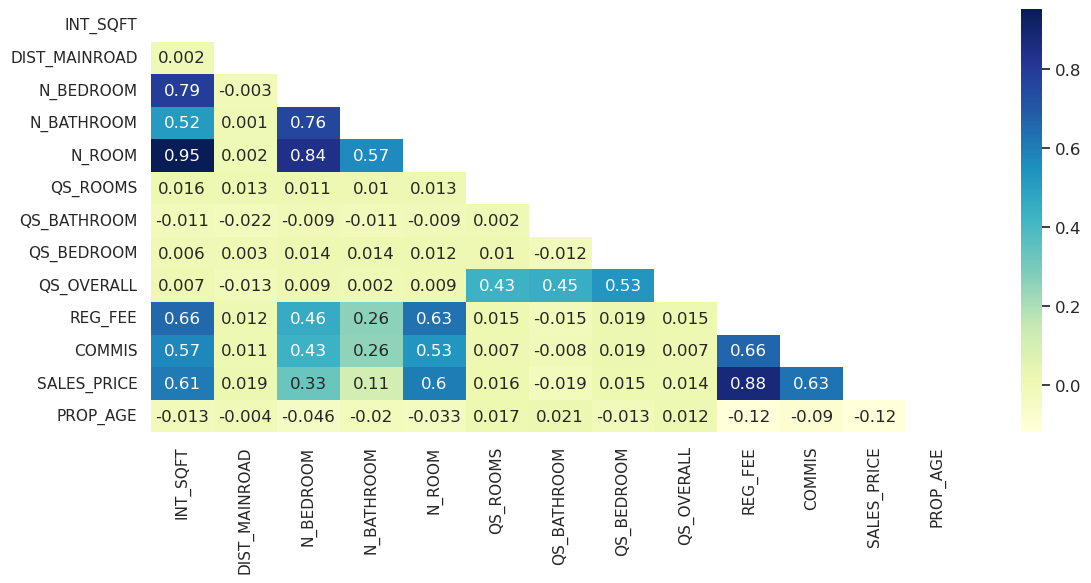

In [68]:
#### Let's see the Correlation patterns with heatmap 
plt.figure(figsize=(12,6))
corr = df.corr(method='pearson').round(3)
my_m=np.triu(corr)
sns.heatmap(corr, mask=my_m, annot=True, cmap="YlGnBu")
plt.xticks(fontsize=11), plt.yticks(fontsize=11)
plt.show()

**Noteworthy Observations**

- Property sale price has a significant correlation with Square feet, number of rooms, registration fee, and commission features
- Property square feet has strong correlation with number of rooms, bathrooms, bedrooms, and also sale price, registration fee, and commission features
- Age of the property is in negative correlation with sale price, registration fee, and commission features

#### Property Count by Area: Top Property Areas in Chennai

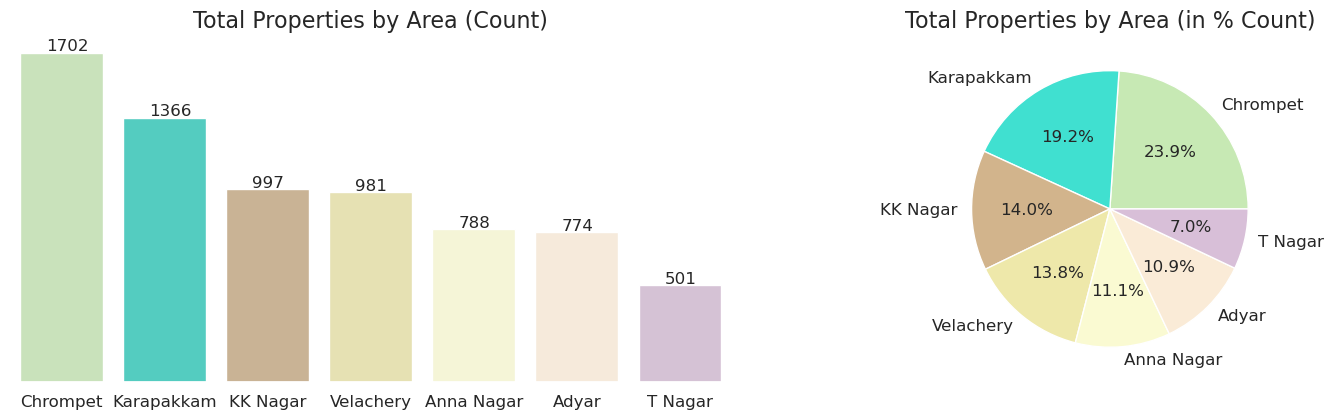

In [69]:
plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
plt.title('Total Properties by Area (Count)',fontsize=16)
ax = sns.countplot(x="AREA", data=df, palette=my_col, order=df['AREA'].value_counts().index)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+8))
plt.xlabel(None), plt.ylabel(None), plt.yticks([])

plt.subplot(2,2,2)
plt.title('Total Properties by Area (in % Count)', fontsize=16)
df['AREA'].value_counts().plot(kind='pie', colors=my_col, legend=None, ylabel='', autopct='%1.1f%%')
plt.show()

**Key Observations** 
- Chrompet and Karapakkam have highest number of properties, followed by KK nagar and Velachery
- Of the lot, T Nagar has lowest number of properties.

#### Property Count by Buildtype, By Area

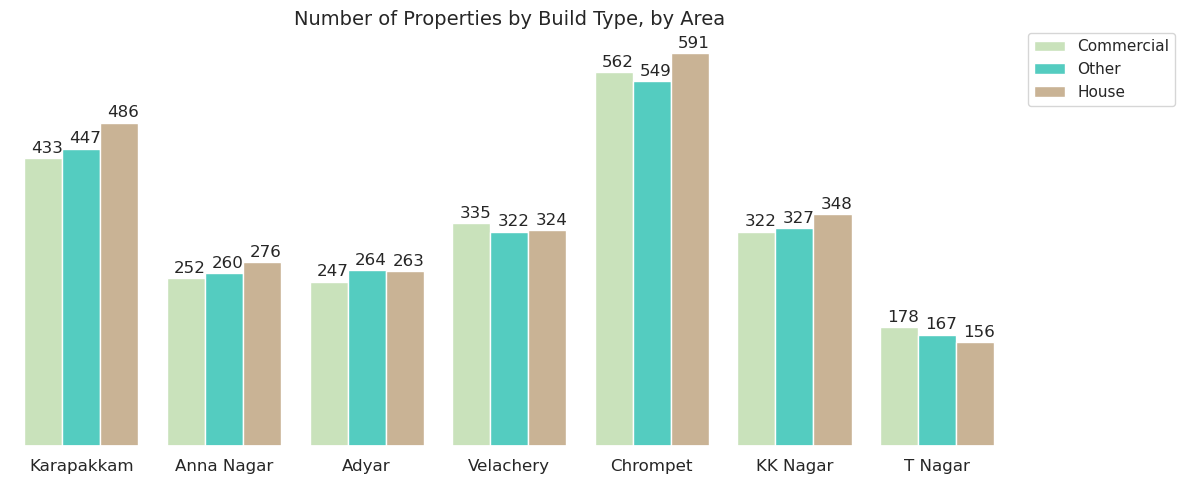

In [70]:
## We make a column chart to visualise property country by build type & by area

plt.figure(figsize=(12,5))
plt.title('Number of Properties by Build Type, by Area', fontsize=14)
ax = sns.countplot(x='AREA', hue='BUILDTYPE', palette=my_col, data=df)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+8))

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel(None), plt.ylabel(None), plt.yticks([])

plt.show()

**Some Observations**
- The plot revealts that Chrompet has highest number of properties overall, followed by Karapakkam
- Chrompet, Karapakkam, KK Nagar, & Anna Nagar have higher number of Residential properties
- T Nagar, & Velachery have higher proportion of commercial properties

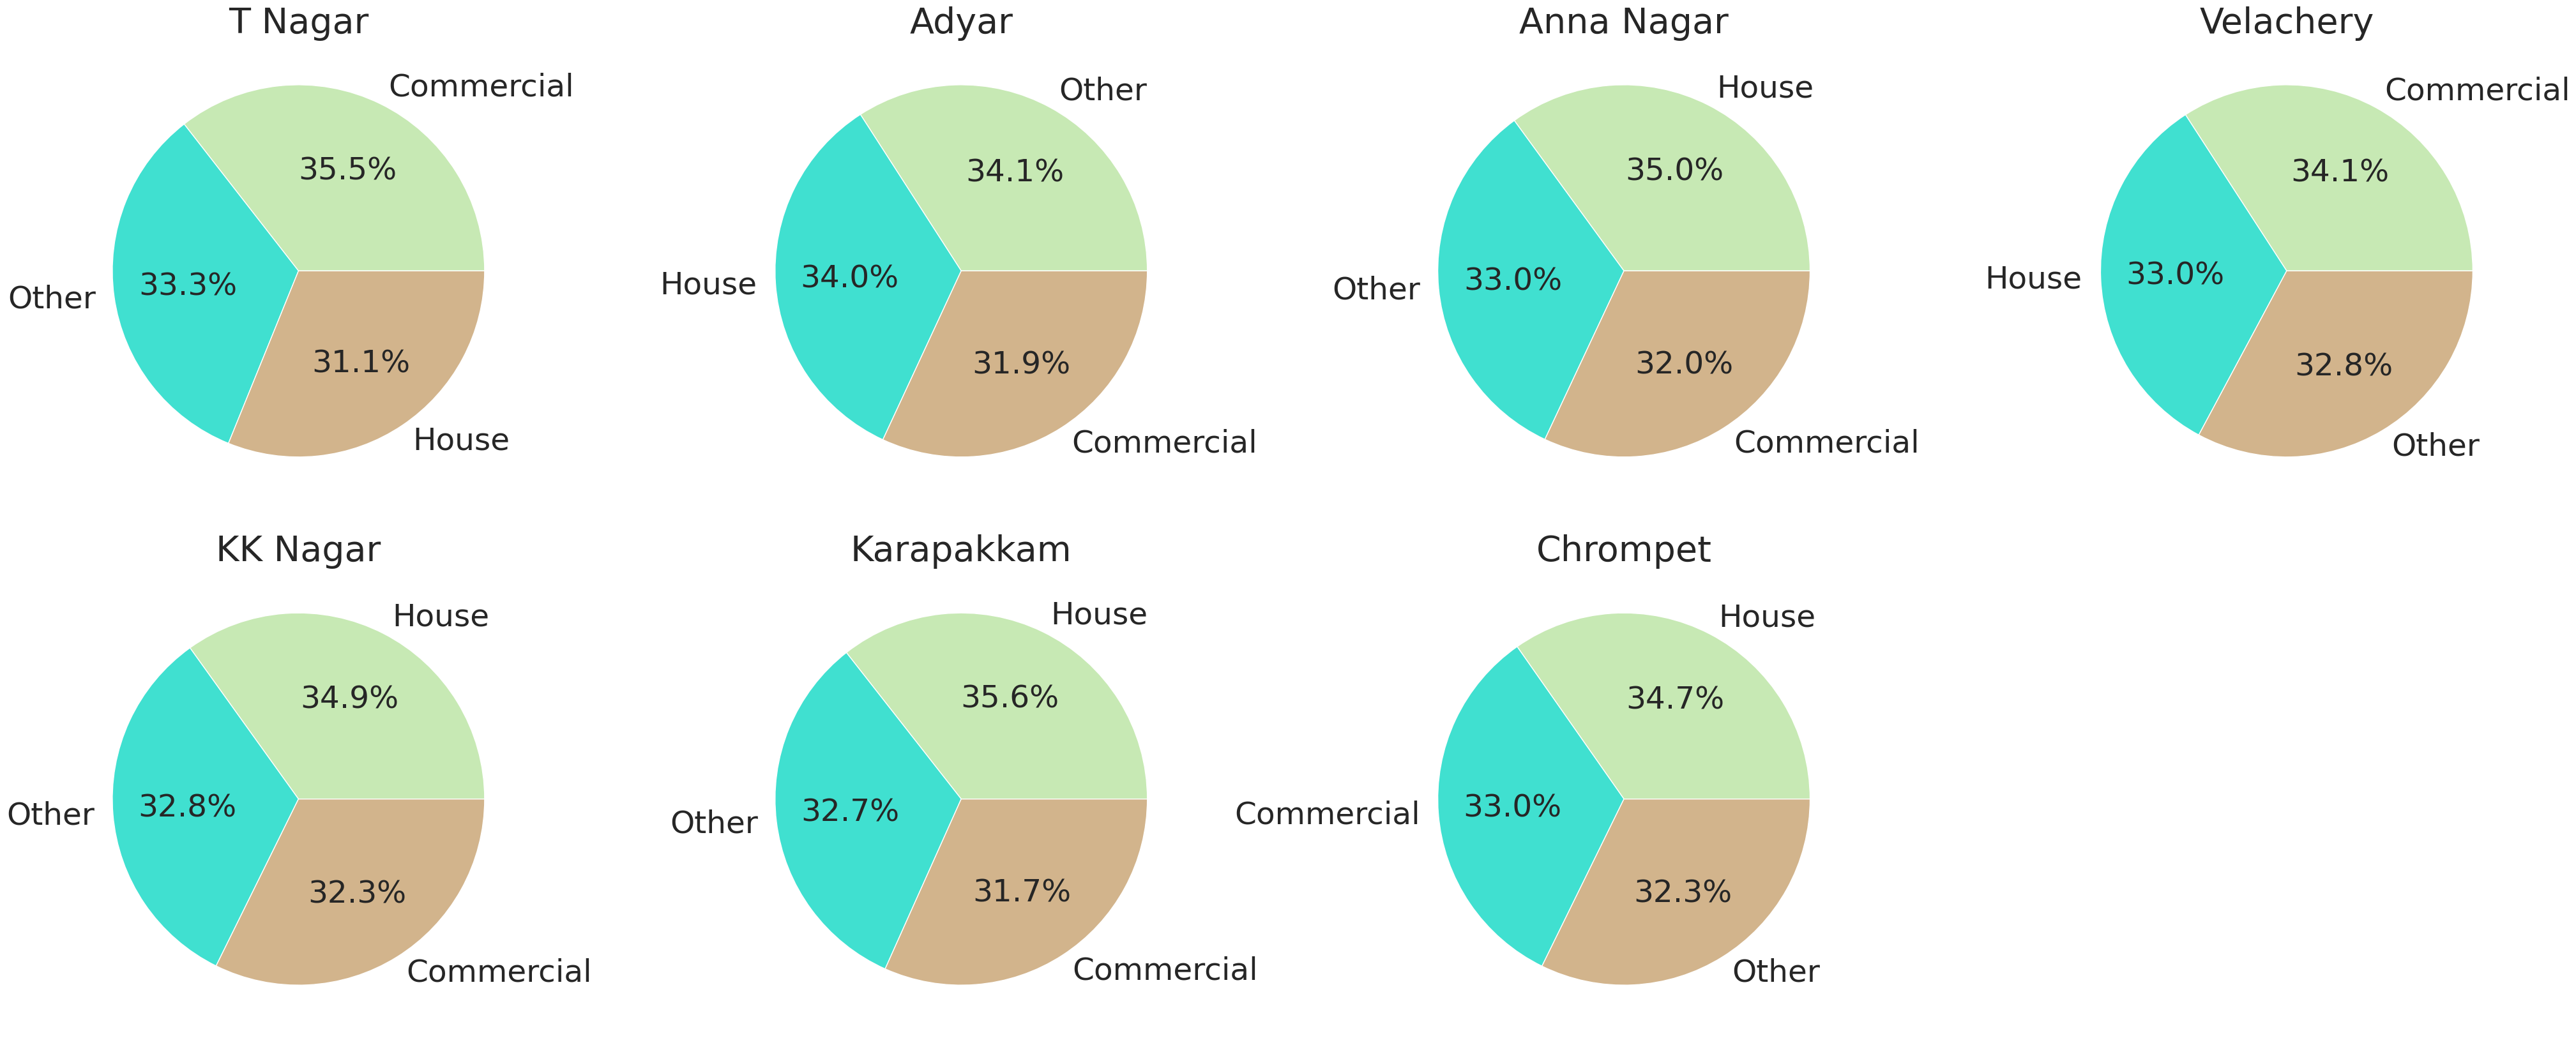

In [71]:
## Now we proceed with pie chart to visualize the property count by buildtype and area

plt.figure(figsize=(40,25))
order=('Commercial', 'House', 'Other')

plt.subplot(3,4,1)
plt.title('T Nagar', fontsize=40)
df['BUILDTYPE'].loc[df['AREA'] == 'T Nagar'].value_counts().plot(kind='pie', colors=my_col, fontsize = 35, legend=None, ylabel='', autopct='%1.1f%%')

plt.subplot(3,4,2)
plt.title('Adyar', fontsize=40)
df['BUILDTYPE'].loc[df['AREA'] == 'Adyar'].value_counts().plot(kind='pie', colors=my_col, fontsize = 35, legend=None, ylabel='', autopct='%1.1f%%')

plt.subplot(3,4,3)
plt.title('Anna Nagar', fontsize=40)
df['BUILDTYPE'].loc[df['AREA'] == 'Anna Nagar'].value_counts().plot(kind='pie', colors=my_col, fontsize = 35, legend=None, ylabel='', autopct='%1.1f%%')

plt.subplot(3,4,4)
plt.title('Velachery', fontsize=40)
df['BUILDTYPE'].loc[df['AREA'] == 'Velachery'].value_counts().plot(kind='pie', colors=my_col, fontsize = 35, legend=None, ylabel='', autopct='%1.1f%%')

plt.subplot(3,4,5)
plt.title('KK Nagar', fontsize=40)
df['BUILDTYPE'].loc[df['AREA'] == 'KK Nagar'].value_counts().plot(kind='pie', colors=my_col, fontsize = 35, legend=None, ylabel='', autopct='%1.1f%%')
plt.subplot(3,4,6)
plt.title('Karapakkam', fontsize=40)
df['BUILDTYPE'].loc[df['AREA'] == 'Karapakkam'].value_counts().plot(kind='pie', colors=my_col, fontsize = 35, legend=None, ylabel='', autopct='%1.1f%%')

plt.subplot(3,4,7)
plt.title('Chrompet', fontsize=40)
df['BUILDTYPE'].loc[df['AREA'] == 'Chrompet'].value_counts().plot(kind='pie', colors=my_col, fontsize = 35, legend=None, ylabel='', autopct='%1.1f%%')
plt.show()

**Key Observations**

- Almost all the regions have similar breakup for three buildtype categories
- There is no drastic variation for the three categories in any of the area

#### **Sale Price Vs Area Insights with Swarmplots & Box & Whisker Plots**

- Lets draw some swarmplots and box & whisker plots to identy the influence of different features on sale price
- Looking at the swarm plot, one can easily identify the distribution of different categories in a feature variable
- Similarly, looking at the box & Whisker plot, one can easily identify the mean value, upper quartile, lower quartile, and outliers on uppper & lower sides
- Box & whisker plots provide reliable visuals to identify pecularities, irregularies and anomalies in the data

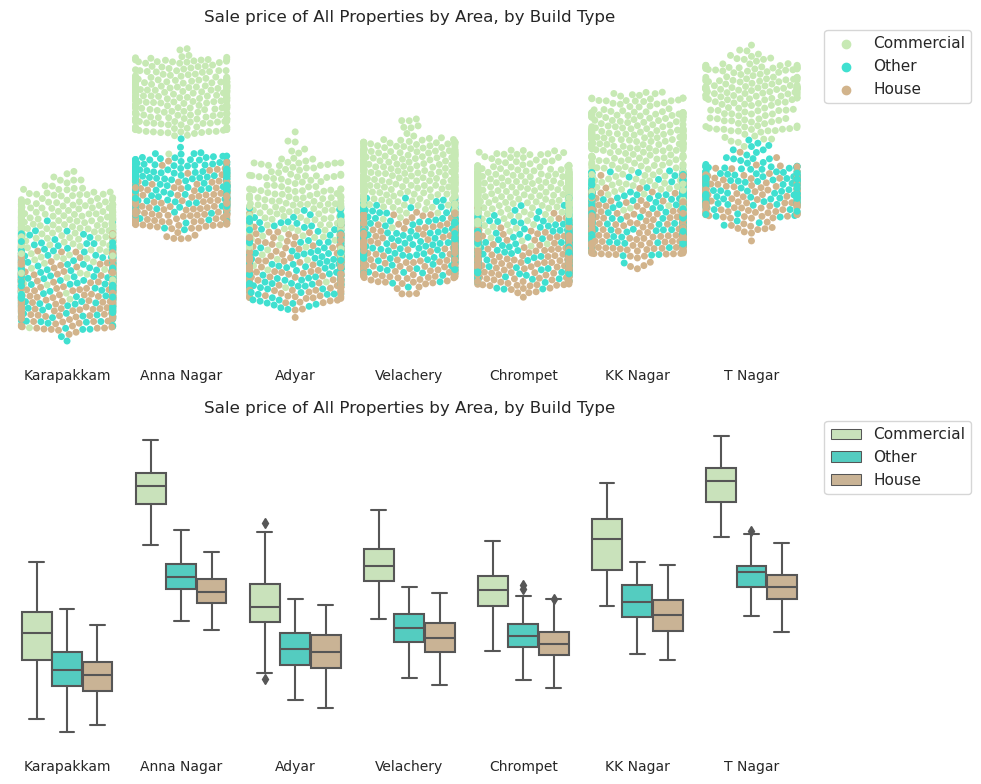

In [72]:
## Sale Price Pattern by Buildtype, By Area

plt.figure(figsize=(10,8))

plt.subplot(2,1,1)
plt.title('Sale price of All Properties by Area, by Build Type',fontsize=12)
sns.swarmplot(data=df, x="AREA", y="SALES_PRICE", hue="BUILDTYPE", palette=my_col)
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)
plt.xlabel(None), plt.ylabel(None), plt.yticks([]), plt.xticks(fontsize=10)

plt.subplot(2,1,2)
plt.title('Sale price of All Properties by Area, by Build Type', fontsize=12)
sns.boxplot(data=df, x="AREA", y="SALES_PRICE", hue="BUILDTYPE", palette=my_col)
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)
plt.xlabel(None), plt.ylabel(None), plt.yticks([]), plt.xticks(fontsize=10)

plt.show()

**Noteworthy Observations**
- As you can see, commercial property is higher priced in almost all the areas, followed by Other buildtype.
- Anna Nagar & T Nagar stand out as the posh property locations in Chennai. These areas also have highest number of properties in paved & gravel streets
- Karapakkam has lowest property price among the areas covered in the dataset
- Adyar, Chrompet, and T Nagar areas have some outliers in the commercial property segment 

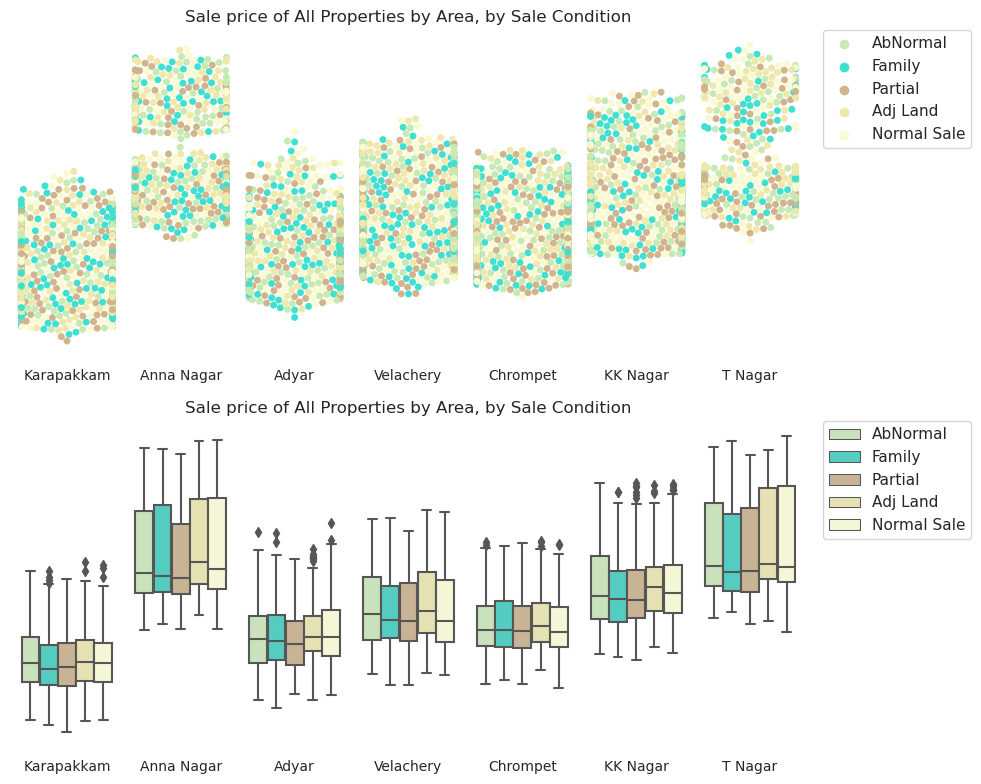

In [73]:
## Property sale prices by Area, by Sale Condition

plt.figure(figsize=(10,8))

plt.subplot(2,1,1)
plt.title('Sale price of All Properties by Area, by Sale Condition', fontsize=12)
sns.swarmplot(data=df, x="AREA", y="SALES_PRICE", hue="SALE_COND", palette=my_col)
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)
plt.xlabel(None), plt.ylabel(None), plt.yticks([]), plt.xticks(fontsize=10)

plt.subplot(2,1,2)
plt.title('Sale price of All Properties by Area, by Sale Condition', fontsize=12)
sns.boxplot(data=df, x="AREA", y="SALES_PRICE", hue="SALE_COND", palette=my_col)
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)
plt.xlabel(None), plt.ylabel(None), plt.yticks([]), plt.xticks(fontsize=10)

plt.show()

- Adj land and Normal sale have higher overall share in Anna Nagar and T Nagar
- AbNormal, Family and Adj Land are prominent in other areas

#### **Pie Charts (for segment share analysis)**

- Lets do some segment share analysis with Pie charts
- We perform a segment share analysis of key features in the dataset such as 'BUILDTYPE','PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'N_ROOM','N_BEDROOM','N_BATHROOM', and 'SALE_COND'.
- By drawng Pie charts for each of these Features, we can get some information about the segments and their behaviour in the dataset

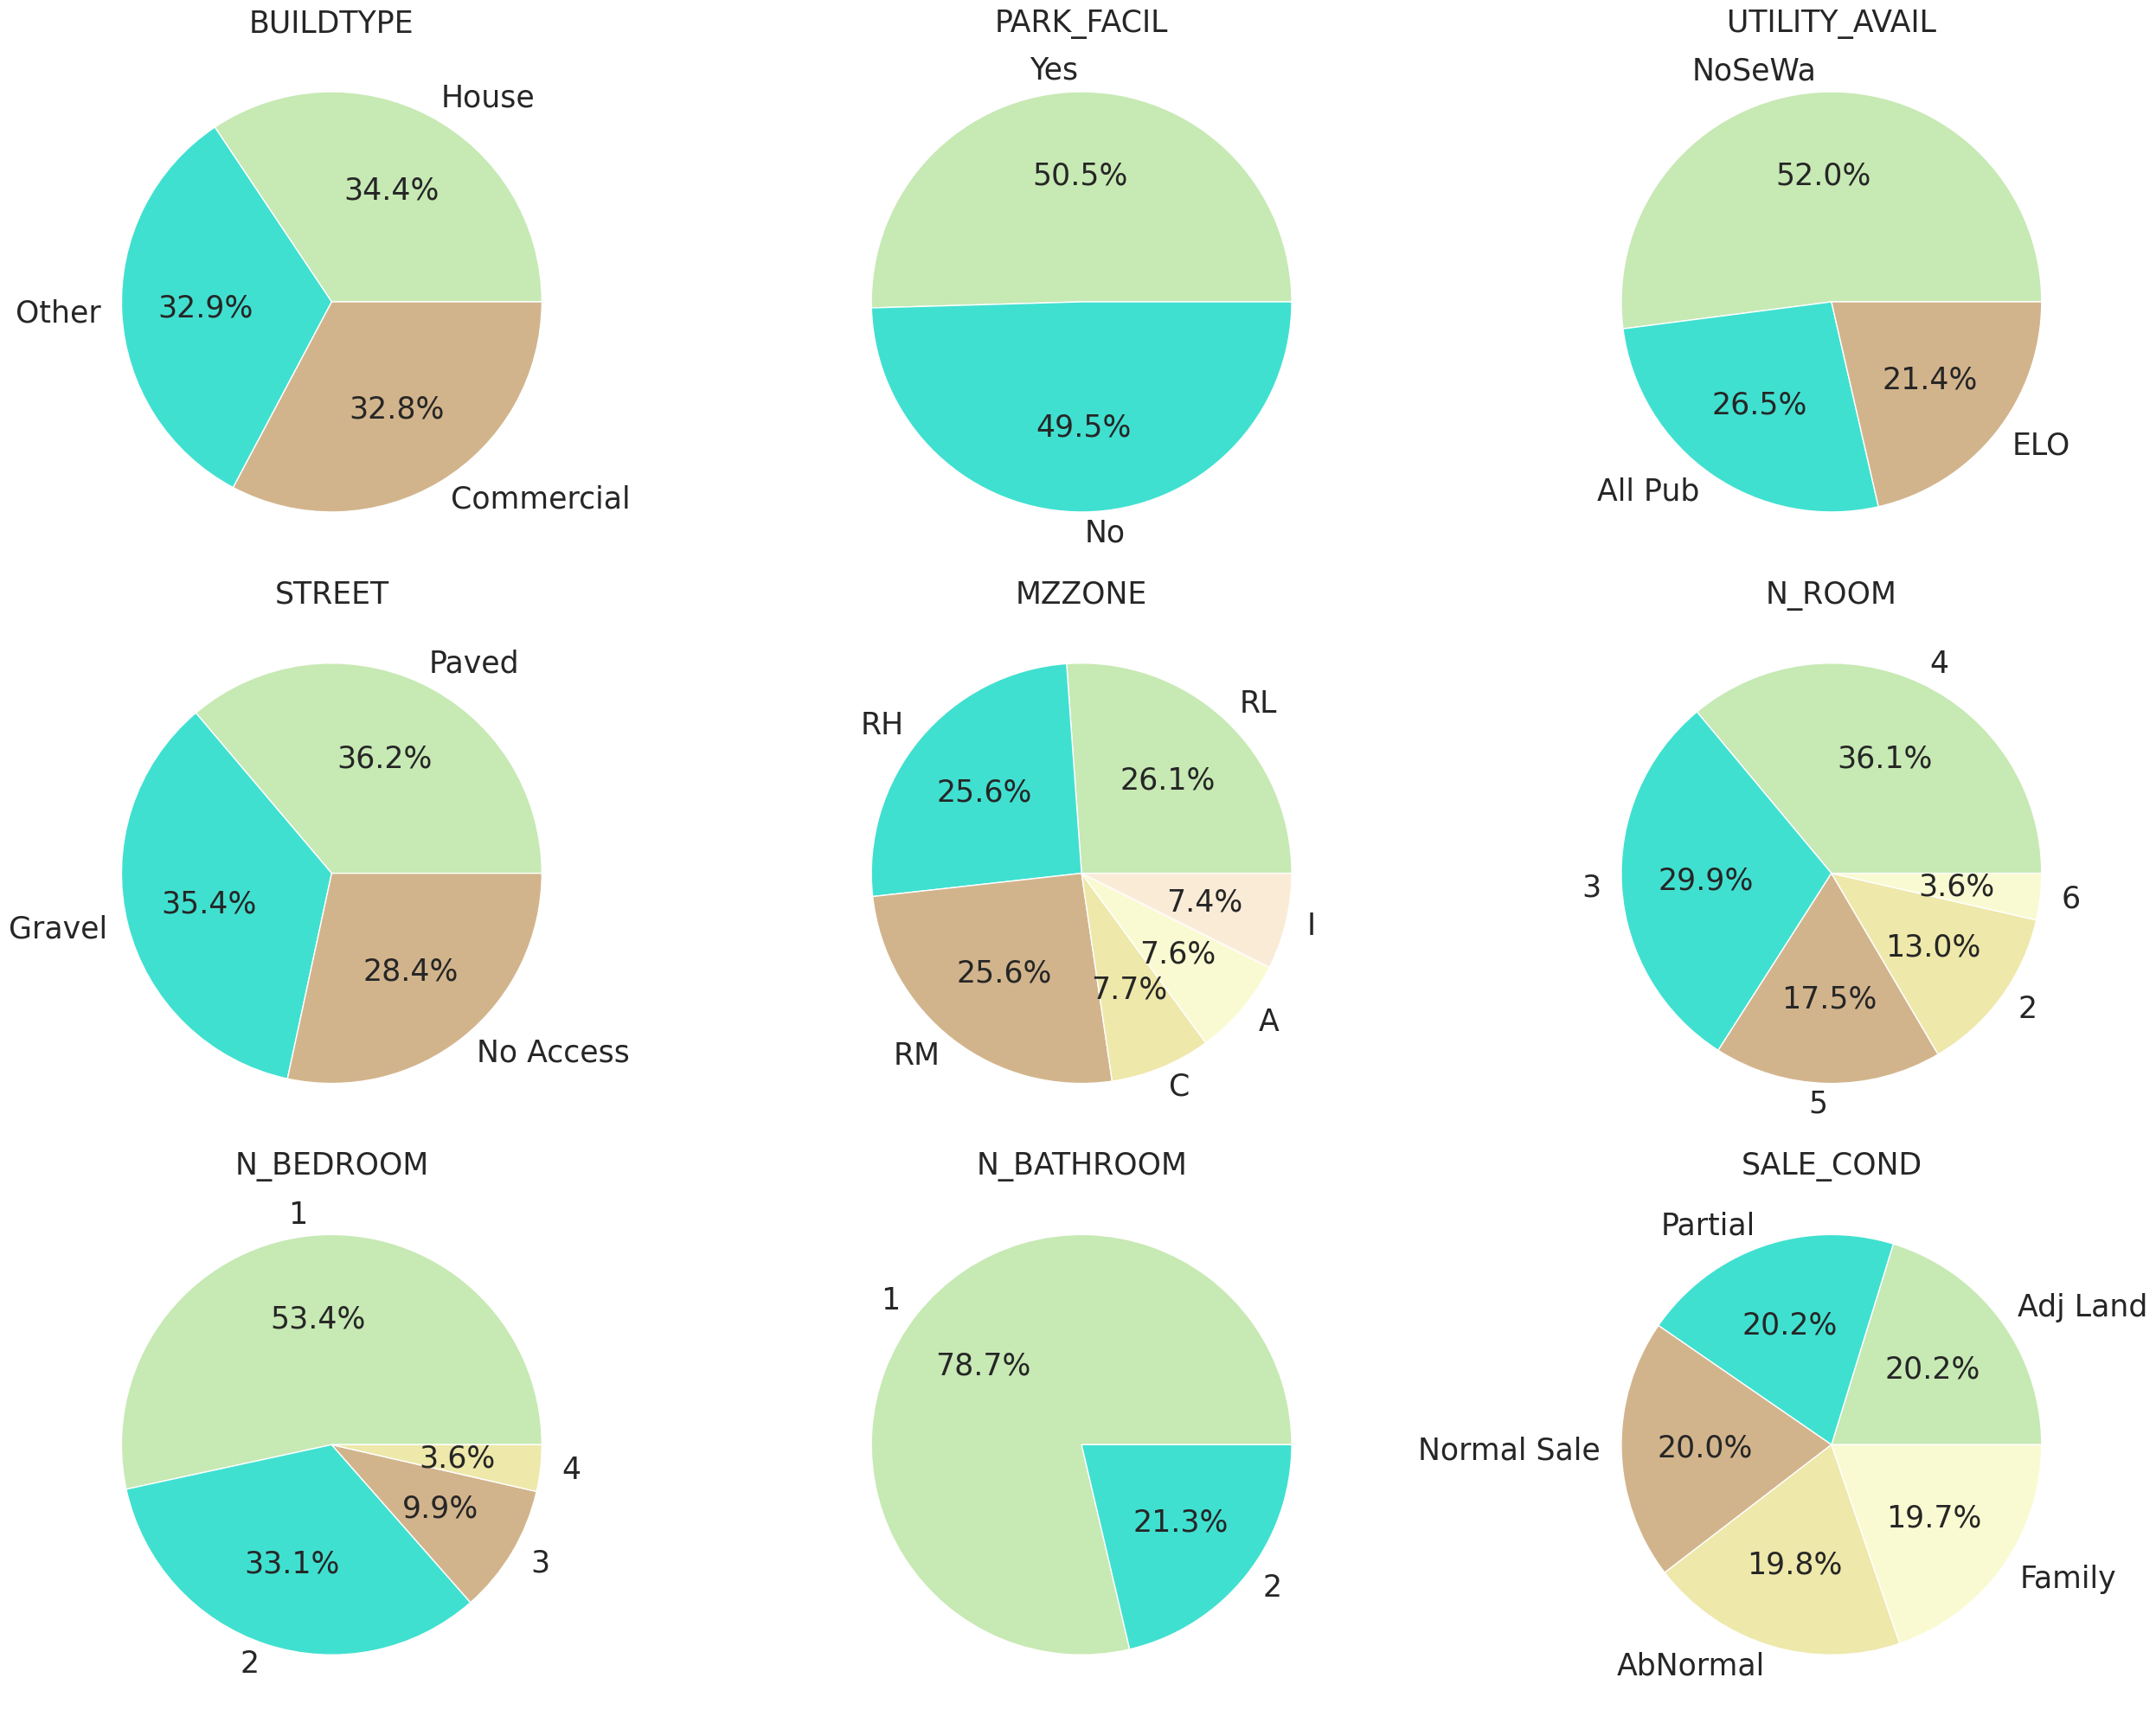

In [74]:
plt.figure(figsize=(26,20))


## BUILD TYPE

plt.subplot(3,3,1)
plt.title('BUILDTYPE', fontsize=25)
df['BUILDTYPE'].value_counts().plot(kind='pie', fontsize = 25, colors=my_col, legend=None, ylabel='', autopct='%1.1f%%')

## PARKING FACILITY

plt.subplot(3,3,2)
plt.title('PARK_FACIL', fontsize=25)
df['PARK_FACIL'].value_counts().plot(kind='pie', fontsize = 25, colors=my_col, legend=None, ylabel='', autopct='%1.1f%%')

## UTILITY AVAILABLE

plt.subplot(3,3,3)
plt.title('UTILITY_AVAIL', fontsize=25)
df['UTILITY_AVAIL'].value_counts().plot(kind='pie', fontsize = 25, colors=my_col, legend=None, ylabel='', autopct='%1.1f%%')

## STREET TYPE

plt.subplot(3,3,4)
plt.title('STREET', fontsize=25)
df['STREET'].value_counts().plot(kind='pie', fontsize = 25, colors=my_col, legend=None, ylabel='', autopct='%1.1f%%')

## MZZONE

plt.subplot(3,3,5)
plt.title('MZZONE', fontsize=25)
df['MZZONE'].value_counts().plot(kind='pie', fontsize = 25, colors=my_col, legend=None, ylabel='', autopct='%1.1f%%')

## NUMBER OF ROOMS

plt.subplot(3,3,6)
plt.title('N_ROOM', fontsize=25)
df['N_ROOM'].value_counts().plot(kind='pie', fontsize = 25, colors=my_col, legend=None, ylabel='', autopct='%1.1f%%')

## NUMBER OF BEDROOMS

plt.subplot(3,3,7)
plt.title('N_BEDROOM', fontsize=25)
df['N_BEDROOM'].value_counts().plot(kind='pie', fontsize = 25, colors=my_col, legend=None, ylabel='', autopct='%1.1f%%')

## NUMBER OF BATHROOMS

plt.subplot(3,3,8)
plt.title('N_BATHROOM', fontsize=25)
df['N_BATHROOM'].value_counts().plot(kind='pie', fontsize = 25, colors=my_col, legend=None, ylabel='',  autopct='%1.1f%%')

## SALE CONDITION

plt.subplot(3,3,9)
plt.title('SALE_COND', fontdict={'fontsize':25})
df['SALE_COND'].value_counts().plot(kind='pie', fontsize = 25, colors=my_col, legend=None, ylabel='', autopct='%1.1f%%')
plt.show()

**Some key observations from the above pie charts**
- The three types of properties viz., Commercial, Residential, and Other, have almost identical distribution
- Properties with & without parking facilities are same in number i.e., 50:50
- Properties with street Paved & Gravel are higher in the number than properties with No Access street
- Properties with number of rooms @4 are common, and properties with single bedroom are most common with over 50% share
- Properties with one bathroom are more common, the segment has almost has 4/5th share
- Interestingly, properties by sale condition shows that all the six types of conditions have similar share

#### **Scatter Plots (Sale Price vs Sq. ft area, Registration fee, & commission)**
- Let's draw some scatter plots to analyze the impact of certain features on sale price
- Scatter plot aid in identifying anomalies and outliers, and also the distribution of datapoints

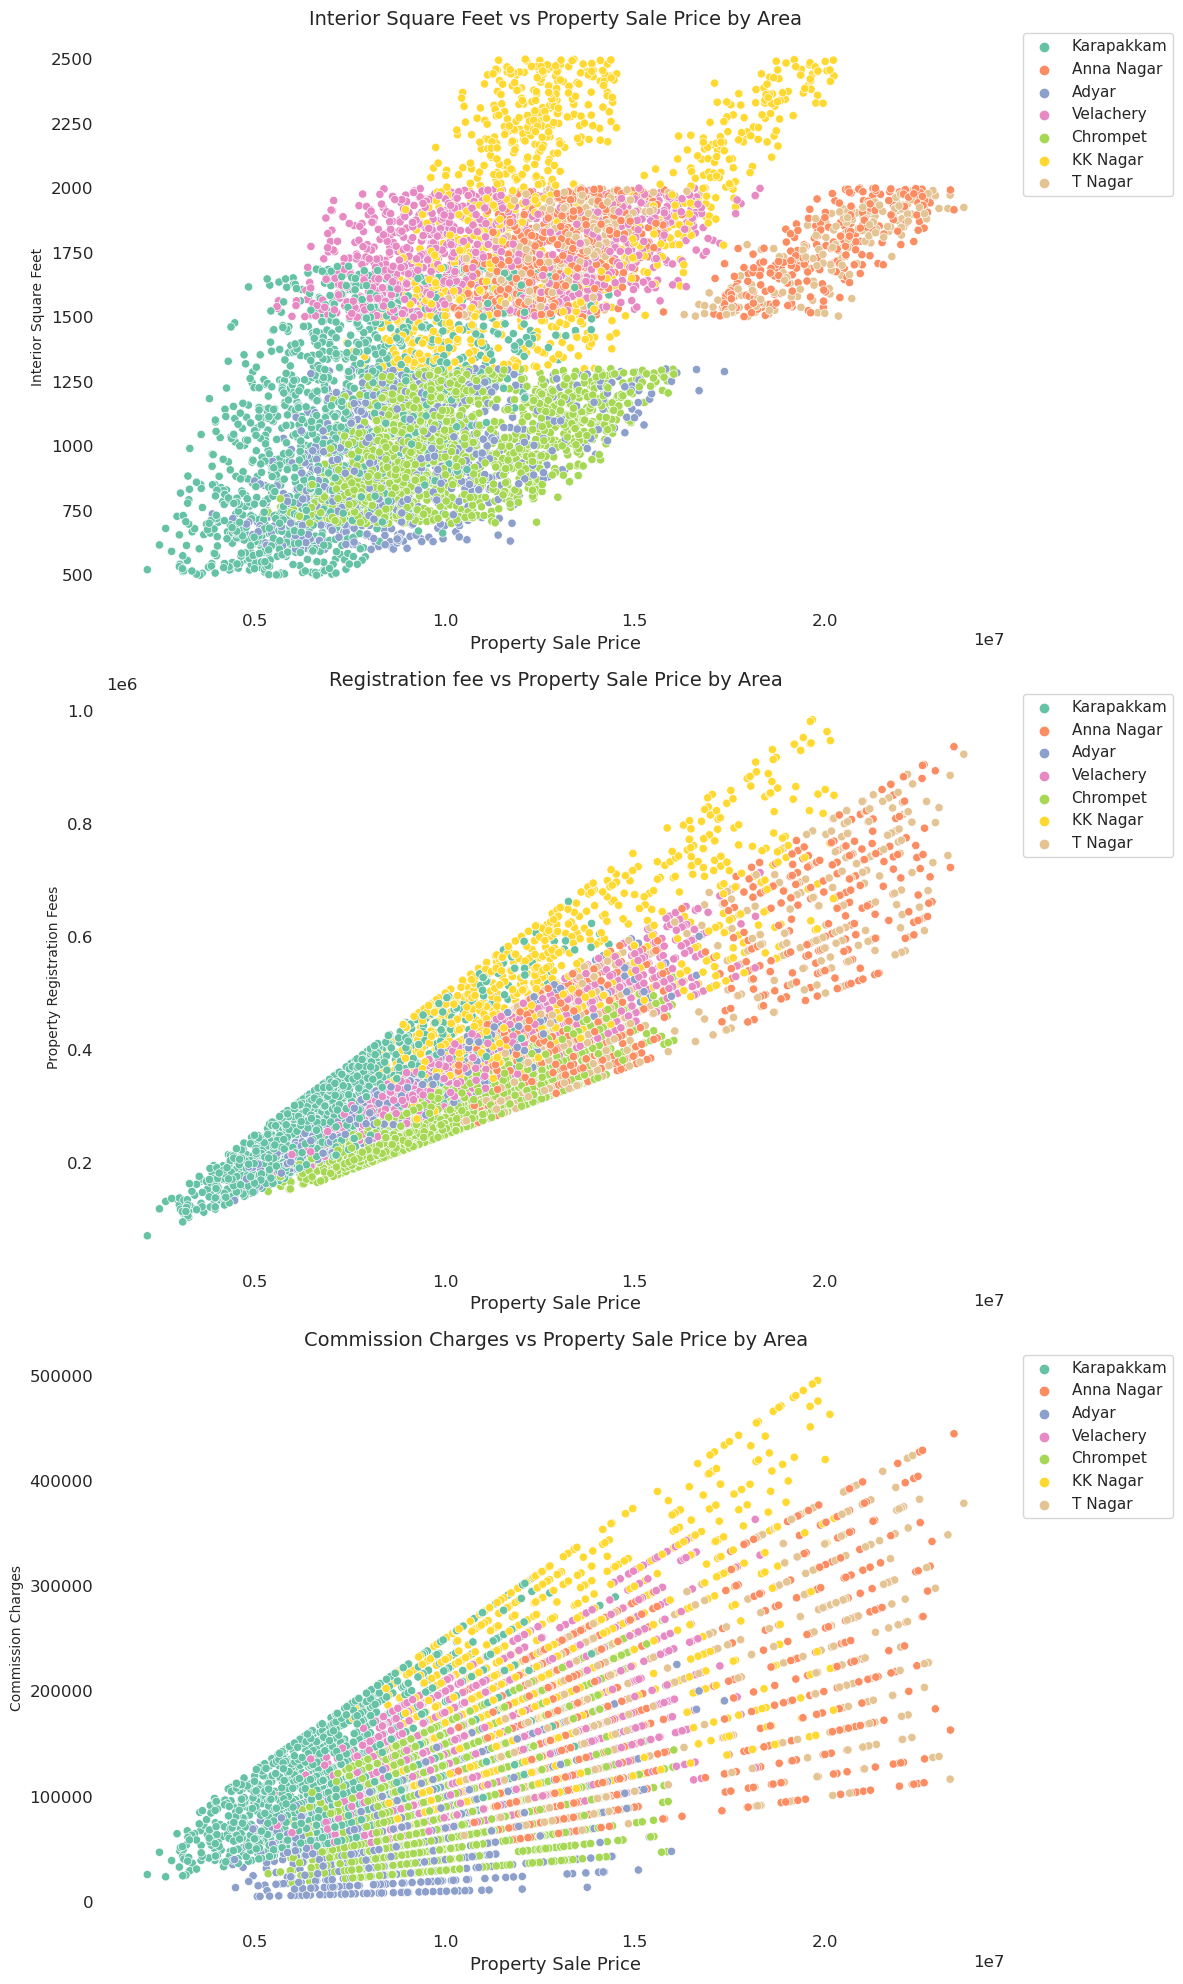

In [87]:
## Sq feet vs sale price
plt.figure(figsize=(12,20))

plt.subplot(3,1,1)
sns.scatterplot(x='SALES_PRICE', y='INT_SQFT', hue='AREA', palette="Set2", data=df)
plt.title('Interior Square Feet vs Property Sale Price by Area', fontsize=14)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Property Sale Price', fontsize=13), plt.ylabel('Interior Square Feet', fontsize=10)

plt.subplot(3,1,2)
plt.title('Registration fee vs Property Sale Price by Area', fontsize=14)
sns.scatterplot(x='SALES_PRICE', y='REG_FEE', hue='AREA', palette="Set2", data=df)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Property Sale Price', fontsize=13), plt.ylabel('Property Registration Fees', fontsize=10)

plt.subplot(3,1,3)
plt.title('Commission Charges vs Property Sale Price by Area', fontsize=14)
sns.scatterplot(x='SALES_PRICE', y='COMMIS', hue='AREA', palette="Set2", data=df)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Property Sale Price', fontsize=13), plt.ylabel('Commission Charges', fontsize=10)

plt.show()

**Some Observations from the above Scatter plots**
- KK Nagar has properties with highest square feet area
- KK Nagar also has highest registration fee & brokerage commission
- Anna Nagar & T Nagar, the two posh locaitons trail behind KK Nagar

## Processing the Data for Modeling

In [76]:
## We encode the features appropriately with label encoder, under two different groups – categorical and numerical
## Later we join categorical & numerical features into a consolidated new dataframe for designing & running our models

## label encoding 

le = LabelEncoder ()

#select ctegorical columns 
cat_df = df.select_dtypes(exclude=["int", "float"])

for i in cat_df:
        cat_df[i] = le.fit_transform(df[i])

#joining the encoded data to the numeric data
num_df = df.select_dtypes(include=['int', 'float'])
main_df = pd.concat([num_df, cat_df], axis=1)

In [77]:
## Fixing X & Y axis 

X = main_df.drop(columns=["SALES_PRICE"])
y = main_df["SALES_PRICE"]


## Standardizing the price data values 

scaler = StandardScaler()
x_scaled=scaler.fit_transform(X)

In [78]:

## Splitting the Data 

X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=0)


## Creating the function to fit models 

model_preds = []

def fit_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = round(r2_score(y_test, y_pred),4)
    mse = round(mean_squared_error(y_test, y_pred),4)
    mae = round(mean_absolute_error(y_test, y_pred),4)
    rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)),4)
    model_preds.append([model_name, r2, mse, mae, rmse])
    print ("The R-Squared Value is         : ", r2)
    print("The Mean Squared error (MSE) is : ", mse)
    print("Root Mean Squared Error (RMSE)  : ", rmse)
    print("Mean Absolute Error (MAE) is    : ", mae)


## Creating the model evaluation function 

def model_eval():
    preds = pd.DataFrame(model_preds)
    preds.columns = ["Mod_Name", "R2 Value", "MSE", "RMSE", "MAE"]
    return preds.sort_values(by="R2 Value", ascending=False)

## Data Modeling

In [79]:

## Linear Regression

print(f'\033[94mLinear Regression')
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
fit_model(lr_model, "Linear Regression")
print('-'* 50)

## Decision Trees

print(f'\033[94mDecision Trees')
dectree_model = DecisionTreeRegressor()
fit_model(dectree_model, "Decision Tree Regressor")
print('-'* 50)

## Random Forest

print(f'\033[94mRandom Forest')
randfor_model = RandomForestRegressor()
fit_model(randfor_model, "Random Forest Regressor")
print('-'* 50)

## XG Boost

print(f'\033[94mXG Boost')
XGB_model = xgb.XGBRFRegressor()
fit_model(XGB_model, "XG Boost")
print('-'*50)

## KNN

print(f'\033[94mKNN')
knn_model = KNeighborsRegressor(n_neighbors=6)
fit_model(knn_model, "K-Neigbors Regressor")

Linear Regression
The R-Squared Value is         :  0.8734
The Mean Squared error (MSE) is :  1718985732795.3513
Root Mean Squared Error (RMSE)  :  1311100.9621
Mean Absolute Error (MAE) is    :  1067444.7537
--------------------------------------------------
Decision Trees
The R-Squared Value is         :  0.9421
The Mean Squared error (MSE) is :  786674247680.0809
Root Mean Squared Error (RMSE)  :  886946.5867
Mean Absolute Error (MAE) is    :  680502.1835
--------------------------------------------------
Random Forest
The R-Squared Value is         :  0.971
The Mean Squared error (MSE) is :  393524119883.53
Root Mean Squared Error (RMSE)  :  627315.0085
Mean Absolute Error (MAE) is    :  496674.2294
--------------------------------------------------
XG Boost
The R-Squared Value is         :  0.9359
The Mean Squared error (MSE) is :  870511073558.4207
Root Mean Squared Error (RMSE)  :  933011.8293
Mean Absolute Error (MAE) is    :  737464.4014
---------------------------------------

## Model evaluation

In [80]:
model_eval()

,Mod_Name,R2 Value,MSE,RMSE,MAE
2,Random Forest Regressor,0.97,393524119883.53,496674.23,627315.01
1,Decision Tree Regressor,0.94,786674247680.08,680502.18,886946.59
3,XG Boost,0.94,870511073558.42,737464.40,933011.83
0,Linear Regression,0.87,1718985732795.35,1067444.75,1311100.96
4,K-Neigbors Regressor,0.84,2202856507279.63,1102973.99,1484202.31


## Predictions

In [81]:
## Predict the model with test data
## We select random forest regressor, since it has better R2 value
y_pred = randfor_model.predict(X_test)

In [82]:
## extracting the output
out=pd.DataFrame({'Sale_Price_actual':y_test,'Sale_Price_pred':y_pred})
result=df.merge(out,left_index=True,right_index=True)

In [83]:
## comparing the predicted prices with actual prices, through a sample 
result[['PRT_ID','AREA','Sale_Price_actual','Sale_Price_pred']].sample(25)

,PRT_ID,AREA,Sale_Price_actual,Sale_Price_pred
2676,P05944,Karapakkam,10711750,11777618.90
719,P08277,Adyar,9202070,9642492.90
1196,P08554,Chrompet,7725200,7970157.50
1139,P01642,Karapakkam,4242000,4475072.50
4493,P07047,Anna Nagar,10688640,11676655.30
5773,P01385,Anna Nagar,21512830,21504940.80
4925,P00148,Chrompet,9550950,9737546.20
4311,P08739,Chrompet,8214800,8611481.20
4933,P02368,Karapakkam,4342750,4918419.65
4662,P01921,T Nagar,21858180,19014724.50


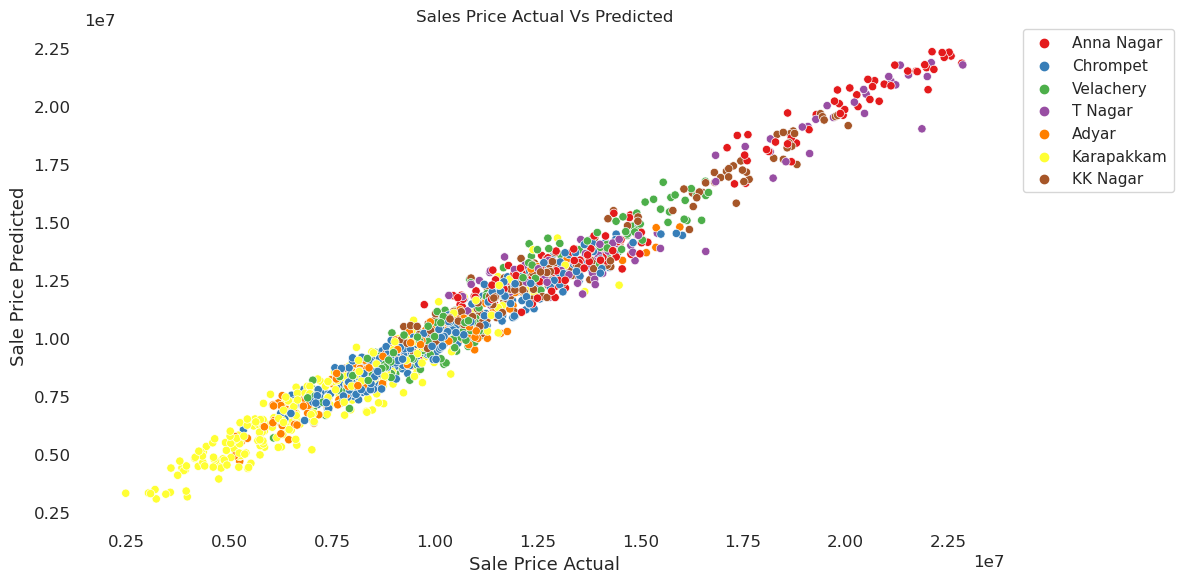

In [84]:
## Let's draw a scatter plot to visualize th predicted prices vs actual prices
plt.figure(figsize=(12,6))
sns.scatterplot(x='Sale_Price_actual', y='Sale_Price_pred', hue='AREA', palette="Set1", data=result).set(title='Sales Price Actual Vs Predicted')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Sale Price Actual', fontsize=13), plt.ylabel('Sale Price Predicted', fontsize=13)
plt.show()

In [85]:
## Now, Let's watch video on Chennai City

from IPython.display import HTML  ## to embed YouTube video

## embedding our YouTube video with HTML() function

HTML ('<iframe width="658" height="370" src="https://www.youtube.com/embed/gTDQKA0hH3M" title="Chennai City | Tamil Nadu | Detroit of Asia | India" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>')

## All the video credits to original creators. 

<p style="float:right; font-family:Sans Serif; color:black; font-size:16px;" > <br>               I hope you will find the notebook relevant and useful.... <br> <br>              Please do share your opinions and thoughts in the comments section.... <br> <br>                        THANKYOU...... <br>